 **Importing Packages**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob
import tensorflow as tf


In [5]:
print(tf.test.gpu_device_name())
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
!cat /proc/meminfo

/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6574903857353676918
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11154422528
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9190846040501557904
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
MemTotal:       13333564 kB
MemFree:         9671036 kB
MemAvailable:   12111652 kB
Buffers:           85616 kB
Cached:          2403048 kB
SwapCached:            0 kB
Active:          1248500 kB
Inactive:        2026676 kB
Active(anon):     659376 kB
Inactive(anon):     2412 kB
Active(file):     589124 kB
Inactive(file):  2024264 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               372 kB
Writeback:             0 kB
AnonPages:        786352 kB
Mapped:           529488 kB
Shmem:              3060 kB
Slab:             185500 kB
SReclaimable:

In [6]:
from google.colab import drive

In [18]:
%cd drive/MyDrive/CNN\ Project

/content/drive/MyDrive/CNN Project


In [19]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



# Configure visualisations
%matplotlib inline


In [20]:
train = pd.read_csv('./fashion-mnist_train.csv')
test = pd.read_csv('./fashion-mnist_test.csv')
df_train = train.copy()
df_test = test.copy()

In [21]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


**Find the shape and other details about image**

In [22]:
print("Training data shape: ", df_train.shape)
print("Testing data shape: ", df_test.shape)

Training data shape:  (60000, 785)
Testing data shape:  (10000, 785)


In [23]:
print("Dataset information type: ")
print(df_train.info())

Dataset information type: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None


**Finding the no of labels**

In [24]:
print("The total no of labels: ", (df_train.label.unique().shape))
print("The unique labels are: ", df_train.label.unique())

The total no of labels:  (10,)
The unique labels are:  [2 9 6 0 3 4 5 8 7 1]


In [25]:
print("The ditribution of labels: ", df_train['label'].value_counts())

The ditribution of labels:  9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64


**Separating input and label**

In [26]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0:1]
print("Shape of X: ", X_train.shape)
print("Shape of Y: ",y_train.shape)

Shape of X:  (60000, 784)
Shape of Y:  (60000, 1)


Since shape is 784, we reshape that to 28*28

In [27]:
X_train = X_train.values.reshape(X_train.shape[0],28,28,1)

In [28]:
print("X shape: ", X_train.shape)

X shape:  (60000, 28, 28, 1)


In [29]:
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0:1]
print("Shape of X: ", X_test.shape)
print("Shape of Y: ",y_test.shape)

Shape of X:  (10000, 784)
Shape of Y:  (10000, 1)


In [30]:
X_test = X_test.values.reshape(X_test.shape[0],28,28,1)

In [31]:
print("X shape: ", X_test.shape)

X shape:  (10000, 28, 28, 1)


**Normalisation**

Since pixels are of the range 0 to 255, we need to scale them

In [32]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

**One hot encoding**

In [33]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [34]:
print("Shape of y train: ", y_train.shape)
print("Shape of y test: ",y_test.shape)

Shape of y train:  (60000, 10)
Shape of y test:  (10000, 10)


In [35]:
print("Example: ", y_train[0])

Example:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


**Building Model**

In [36]:
from keras.regularizers import l2
model = Sequential()

# Hidden layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer 3
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', strides=1, padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
   
# Hidden layer 4   
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

**Trying to use Adam Propagation**

In [37]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [38]:
print("Summary of the model: ")
model.summary()

Summary of the model: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (Non

**We change the learning rate as the model evolves**

In [39]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

**Data Augmentation**

In [40]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.3,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

**Create validation set also**

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

print('Training set shape: ', X_train.shape, y_train.shape)
print('Validation set shape: ', X_val.shape, y_val.shape)

Training set shape:  (51000, 28, 28, 1) (51000, 10)
Validation set shape:  (9000, 28, 28, 1) (9000, 10)


**Training the Model**

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 80), epochs = 75, 
                              validation_data = (X_val, y_val), verbose=1, 
                              callbacks = [reduce_lr, early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/75
638/638 [==============================] - 29s 45ms/step - loss: 0.4159 - accuracy: 0.8845 - val_loss: 0.3702 - val_accuracy: 0.8979
Epoch 2/75
638/638 [==============================] - 28s 44ms/step - loss: 0.3966 - accuracy: 0.8873 - val_loss: 0.3690 - val_accuracy: 0.8961
Epoch 3/75
638/638 [==============================] - 29s 45ms/step - loss: 0.3970 - accuracy: 0.8890 - val_loss: 0.4033 - val_accuracy: 0.8849
Epoch 4/75
638/638 [==============================] - 28s 44ms/step - loss: 0.3991 - accuracy: 0.8848 - val_loss: 0.4045 - val_accuracy: 0.8797
Epoch 5/75
638/638 [==============================] - 28s 44ms/step - loss: 0.3972 - accuracy: 0.8868 - val_loss: 0.4302 - val_accuracy: 0.8700
Epoch 6/75
638/638 [==============================] - 28s 45ms/step - loss: 0.3905 - accuracy: 0.8876 - val_loss: 0.3423 - val_accuracy: 0.9054
Epoch 7/75
638/638 [==============================] - 28s 44ms/step - loss: 0.3866 - accuracy: 0.8897 - val_loss: 0.3856 - val_accuracy:

**Plotting graphs**

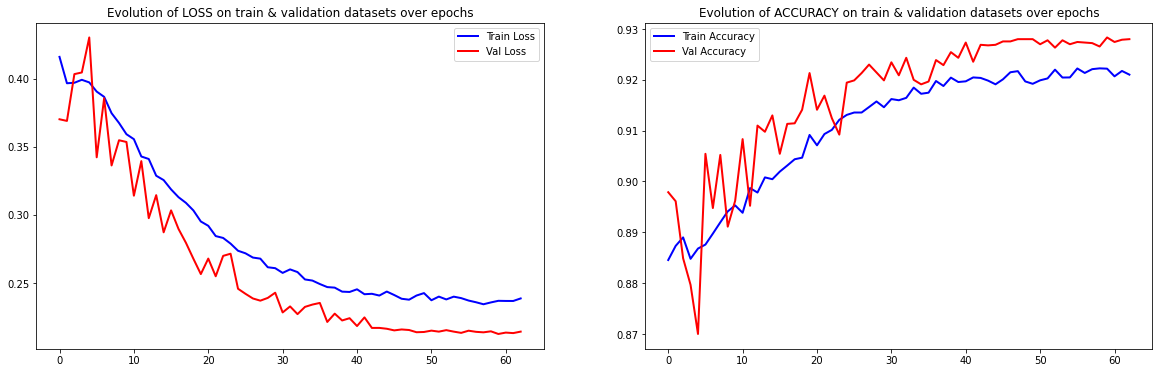

In [70]:
# Check how loss & mae went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_acc = history.history['accuracy']
epoch_val_acc = history.history['val_accuracy']

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Val Loss')
plt.title('Evolution of LOSS on train & validation datasets over epochs')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(range(0,len(epoch_acc)), epoch_acc, 'b-', linewidth=2, label='Train Accuracy')
plt.plot(range(0,len(epoch_val_acc)), epoch_val_acc, 'r-', linewidth=2,label='Val Accuracy')
plt.title('Evolution of ACCURACY on train & validation datasets over epochs')
plt.legend(loc='best')

plt.show()

**Evaluating model**

In [65]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2002 - accuracy: 0.9340


In [66]:
print('Loss of the model: {:.4f}'.format(score[0]))
print('Accuracy of the model: {:.4f}'.format(score[1]))

Loss of the model: 0.2002
Accuracy of the model: 0.9340


**Plotting confusion matrix**

In [68]:
from sklearn.metrics import confusion_matrix, classification_report
# Predict the values from the validation dataset
y_pred = model.predict(X_test)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

Text(0.5, 0, 'Predicted label')

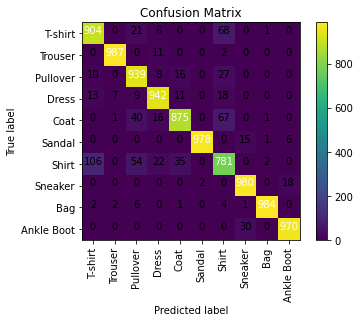

In [69]:
classes = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
plt.imshow(confusion_mtx, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
  plt.text(j, i, confusion_mtx[i, j],
  horizontalalignment="center",
  color="white" if confusion_mtx[i, j] > thresh else "black")


plt.ylabel('True label')
plt.xlabel('Predicted label')

**Correctly Predicted classes**

In [88]:
correct = []
i = 0
for i in range(0, len(y_test), 50):
    if(y_pred_classes[i] == y_true[i]):
        correct.append(i)
    # i += 45
    if(len(correct) == 4):
        break

In [89]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

Text(0.5, 1.0, 'Predicted Label : Coat\nActual Label : Coat')

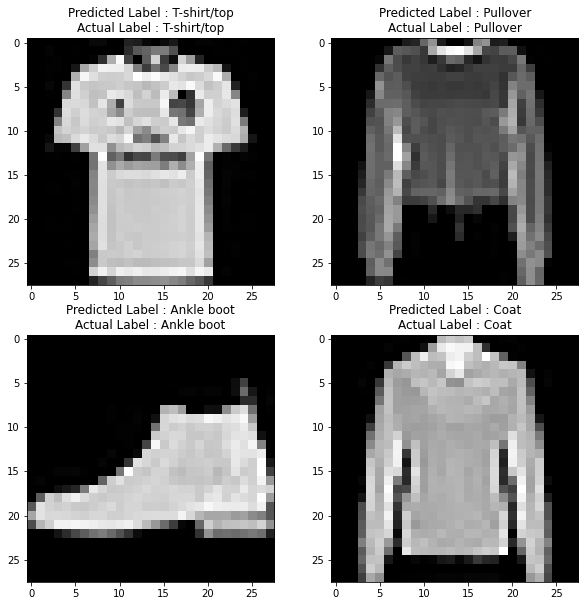

In [90]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[correct[0]]]))
ax[0,1].imshow(X_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[correct[1]]]))
ax[1,0].imshow(X_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[correct[2]]]))
ax[1,1].imshow(X_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[correct[3]]]))

**Incorrectly predicted classes**

In [91]:
incorrect = []
i = 0
for i in range(0, len(y_test), 50):
    if(not y_pred_classes[i] == y_true[i]):
        incorrect.append(i)
    # i += 45
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Coat\nActual Label : Pullover')

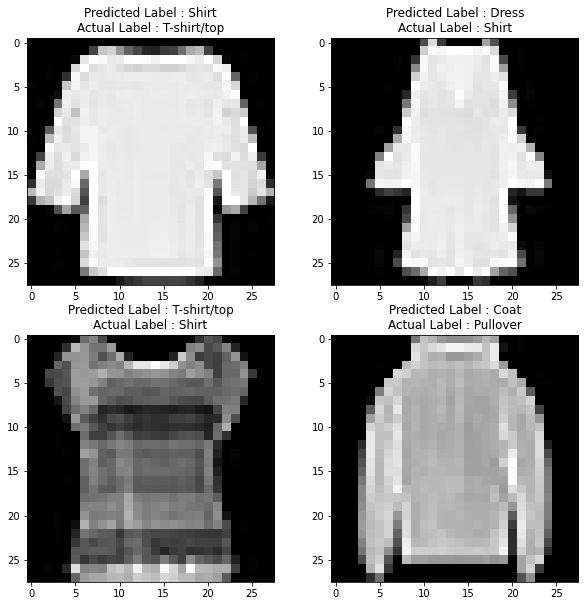

In [94]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(X_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[incorrect[0]]]))
ax[0,1].imshow(X_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[incorrect[1]]]))
ax[1,0].imshow(X_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[incorrect[2]]]))
ax[1,1].imshow(X_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing[y_true[incorrect[3]]]))